# Analiza pripetih sporočil

In [1]:
# uporabljene knjižnice
import json
import pandas as pdz
from dateutil.parser import parse

In [2]:
# prvi semester
matematika = json.load(open('DATA/matematika.json', encoding="utf8"))
matDf = pd.DataFrame(matematika["messages"]) 

diskretne = json.load(open('DATA/diskretne-strukture.json', encoding="utf8"))
dsDf = pd.DataFrame(diskretne["messages"]) 

programiranje1 = json.load(open('DATA/programiranje-1.json', encoding="utf8"))
p1Df = pd.DataFrame(programiranje1["messages"]) 

uvod = json.load(open('DATA/uvod-v-racunalnistvo.json', encoding="utf8"))
uvDf = pd.DataFrame(uvod["messages"]) 

arhitektura = json.load(open('DATA/racunalniska-arhitektura.json', encoding="utf8"))
arDf = pd.DataFrame(arhitektura["messages"])

In [3]:
# drugi semester 
komunikacije = json.load(open('DATA/racunalniske-komunikacije.json', encoding="utf8"))
rkDf = pd.DataFrame(komunikacije["messages"]) 

operacijski = json.load(open('DATA/operacijski-sistemi.json', encoding="utf8"))
osDf = pd.DataFrame(operacijski["messages"]) 

programiranje2 = json.load(open('DATA/programiranje-2.json', encoding="utf8"))
p2Df = pd.DataFrame(programiranje2["messages"]) 

podatkovneBaze = json.load(open('DATA/podatkovne-baze.json', encoding="utf8"))
pbDf = pd.DataFrame(podatkovneBaze["messages"]) 

statistika = json.load(open('DATA/statistika.json', encoding="utf8"))
visDf = pd.DataFrame(statistika["messages"])

In [19]:
def studijsko_leto(row):
    if row.timestamp < pd.Timestamp(2018, 10, 1):
        return "17/18"
    if row.timestamp < pd.Timestamp(2019, 10, 1):
        return "18/19"
    if row.timestamp < pd.Timestamp(2020, 10, 1):
        return "19/20"
    else:
        return "20/21"
    
# Spremenimo format datuma
# Nastavimo stolpec studijskoLeto
for df in [matDf, dsDf, p1Df, uvDf, arDf, rkDf, osDf, p2Df, pbDf, visDf]:
    df["timestamp"] = df["timestamp"].apply(lambda x: parse(x).date())
    df["Študijsko leto"] = df.apply(lambda row: studijsko_leto(row), axis=1)

In [20]:
# df-ji vseh pripetih sporocil
pripetiDf = [
    matDf.loc[matDf["isPinned"]],
    dsDf.loc[dsDf["isPinned"]],
    p1Df.loc[p1Df["isPinned"]],
    uvDf.loc[uvDf["isPinned"]],
    arDf.loc[arDf["isPinned"]],
    rkDf.loc[rkDf["isPinned"]],
    osDf.loc[osDf["isPinned"]],
    p2Df.loc[p2Df["isPinned"]],
    pbDf.loc[pbDf["isPinned"]],
    visDf.loc[visDf["isPinned"]],
]

In [27]:
mat = pripetiDf[0].groupby("Študijsko leto")["Študijsko leto"].count().rename('Matematika')
ds = pripetiDf[1].groupby("Študijsko leto")["Študijsko leto"].count().rename('Diskretne strukture')
p1 = pripetiDf[2].groupby("Študijsko leto")["Študijsko leto"].count().rename('Programiranje 1')
ur = pripetiDf[3].groupby("Študijsko leto")["Študijsko leto"].count().rename('Uvod v računalništvo')
ra = pripetiDf[4].groupby("Študijsko leto")["Študijsko leto"].count().rename('Računalniška arhitektura')
rk = pripetiDf[5].groupby("Študijsko leto")["Študijsko leto"].count().rename('Računalniške komunikacije')
os = pripetiDf[6].groupby("Študijsko leto")["Študijsko leto"].count().rename('Operacijsko sistemi')
p2 = pripetiDf[7].groupby("Študijsko leto")["Študijsko leto"].count().rename('Programiranje 2')
pb = pripetiDf[8].groupby("Študijsko leto")["Študijsko leto"].count().rename('Podatkovne baze')
vis = pripetiDf[9].groupby("Študijsko leto")["Študijsko leto"].count().rename('Verjetnost in statistika')

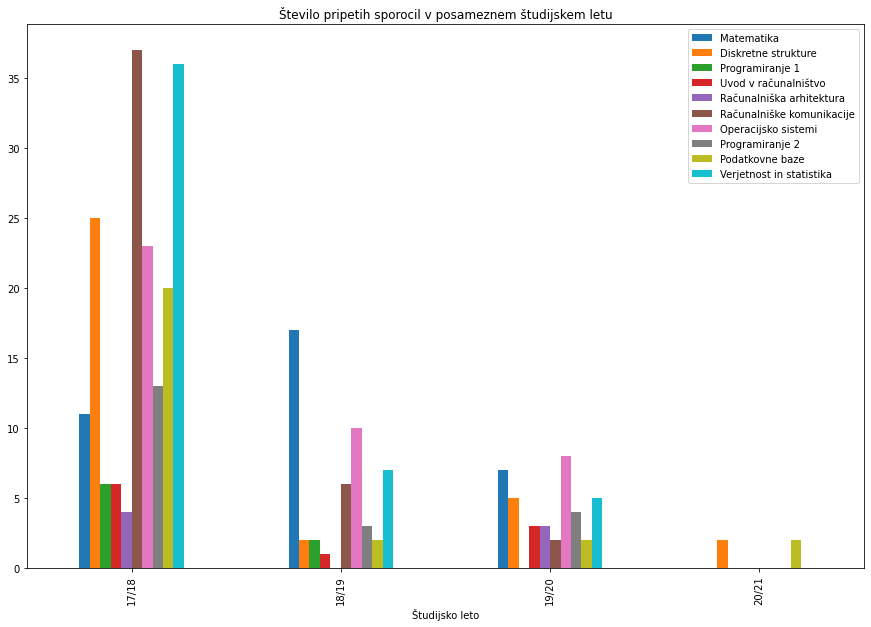

In [30]:
graf = pd.concat([mat, ds, p1, ur, ra, rk, os, p2, pb, vis], axis=1).reset_index()
ax = graf.plot(x="Študijsko leto", kind="bar", figsize=(15, 10),
               title="Število pripetih sporocil v posameznem študijskem letu")

In [29]:
graf["skupaj"] = graf.iloc[:, 1:10].sum(axis=1)
graf

,Študijsko leto,Matematika,Diskretne strukture,Programiranje 1,Uvod v računalništvo,Računalniška arhitektura,Računalniške komunikacije,Operacijsko sistemi,Programiranje 2,Podatkovne baze,Verjetnost in statistika,skupaj
0,17/18,11.0,25,6.0,6.0,4.0,37.0,23.0,13.0,20,36.0,145.0
1,18/19,17.0,2,2.0,1.0,NaN,6.0,10.0,3.0,2,7.0,43.0
2,19/20,7.0,5,NaN,3.0,3.0,2.0,8.0,4.0,2,5.0,34.0
3,20/21,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4.0


Stevilo pripetih sporocil, ki ponavadi predstavljajo snov, se je z leti precej zmanjsalo. To ponazarja, da veliko studentov sevedno uporablja snov preteklih let. Pri nekaterih predmetih se je z leti prenehalo dodajanje snovi. Iz tega lahko razberemo, da se tudi snov pri posameznih predmetih ne spreminja veliko.